In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [2]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


### load packages

In [3]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [5]:
from sklearn.datasets import make_moons

In [6]:
X_train, Y_train = make_moons(1000, random_state=0, noise=0.1)
X_train_flat = X_train

In [7]:
X_test, Y_test = make_moons(1000, random_state=1, noise=0.1)
X_test_flat = X_test

In [8]:
X_valid, Y_valid = make_moons(1000, random_state=2, noise=0.1)

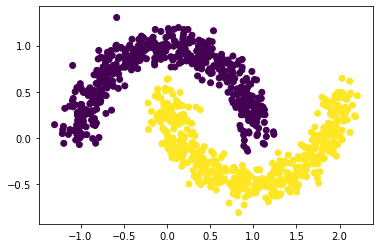

In [9]:
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test)

### Create model and train

In [10]:
dims = (2)
dataset = 'moons'

In [11]:
n_components = 2
encoder = tf.keras.Sequential()
encoder.add(tf.keras.layers.InputLayer(input_shape=dims))
encoder.add(tf.keras.layers.Flatten())
encoder.add(tf.keras.layers.Dense(units=100, activation="relu"))
encoder.add(tf.keras.layers.Dense(units=100, activation="relu"))
encoder.add(tf.keras.layers.Dense(units=100, activation="relu"))
encoder.add(
    tf.keras.layers.Dense(units=n_components, name="z")
)

In [12]:
batch_size = 1000

In [13]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [14]:
from tfumap.parametric_tsne import compute_joint_probabilities, tsne_loss

In [15]:
save_loc = DATA_DIR/ 'parametric_tsne'/ dataset / 'P.npy'
if save_loc.exists():
    P = np.load(save_loc)
else:
    P = compute_joint_probabilities(X_train_flat, batch_size=batch_size, perplexity=30, verbose=2)
    ensure_dir(save_loc)
    np.save(save_loc, P)

In [16]:
X_train_subset = X_train[:np.product(P.shape[:2])]

In [17]:
# Joint probabilities of data
Y_train_tsne = P.reshape(X_train_subset.shape[0], -1)

In [18]:
opt = tf.keras.optimizers.Adam(lr=0.01)

In [19]:
encoder.compile(loss=tsne_loss(d=n_components, batch_size=batch_size), optimizer=opt)

In [20]:
X_train_subset = np.reshape(X_train_subset, ([len(X_train_subset)]+ [dims]))

In [21]:
# because shuffle == False, the same batches are used each time...
history = encoder.fit(X_train_subset, Y_train_tsne, batch_size=batch_size, shuffle=False, nb_epoch=1000)

W0720 13:34:26.592827 140051801663296 training.py:792] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1000 samples
Epoch 1/1000
1000/1000 [==============================] - 1s 575us/sample - loss: 3.4567
Epoch 2/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 3.3197
Epoch 3/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 3.0083
Epoch 4/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 2.6154
Epoch 5/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 2.1958
Epoch 6/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 1.7930
Epoch 7/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 1.4328
Epoch 8/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 1.1348
Epoch 9/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.9027
Epoch 10/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.7296
Epoch 11/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.6102
Epoch 12/1000
100

Epoch 94/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3590
Epoch 95/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3586
Epoch 96/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3582
Epoch 97/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3578
Epoch 98/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3574
Epoch 99/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3570
Epoch 100/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3567
Epoch 101/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3564
Epoch 102/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3560
Epoch 103/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3557
Epoch 104/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3553
Epoch 105/1000
1000/1000 [=

1000/1000 [==============================] - 0s 4us/sample - loss: 0.3362
Epoch 187/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3361
Epoch 188/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3359
Epoch 189/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3358
Epoch 190/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3357
Epoch 191/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3356
Epoch 192/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3357
Epoch 193/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3356
Epoch 194/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3354
Epoch 195/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3354
Epoch 196/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3351
Epoch 197/1000
1000/1000 [==========

Epoch 279/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3292
Epoch 280/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3287
Epoch 281/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3285
Epoch 282/1000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.3291
Epoch 283/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3298
Epoch 284/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3303
Epoch 285/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3295
Epoch 286/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3277
Epoch 287/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3268
Epoch 288/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3275
Epoch 289/1000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.3286
Epoch 290/1000
1000/1

1000/1000 [==============================] - 0s 4us/sample - loss: 0.3260
Epoch 372/1000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.3299
Epoch 373/1000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.3272
Epoch 374/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3240
Epoch 375/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3245
Epoch 376/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3254
Epoch 377/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3255
Epoch 378/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3248
Epoch 379/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3234
Epoch 380/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3237
Epoch 381/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3242
Epoch 382/1000
1000/1000 [==========

Epoch 464/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3193
Epoch 465/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3192
Epoch 466/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3188
Epoch 467/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3187
Epoch 468/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3186
Epoch 469/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3186
Epoch 470/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3187
Epoch 471/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3186
Epoch 472/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3185
Epoch 473/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3184
Epoch 474/1000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.3184
Epoch 475/1000
1000/1

1000/1000 [==============================] - 0s 4us/sample - loss: 0.3172
Epoch 557/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3179
Epoch 558/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3173
Epoch 559/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3171
Epoch 560/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3172
Epoch 561/1000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.3169
Epoch 562/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3165
Epoch 563/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3170
Epoch 564/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3169
Epoch 565/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3167
Epoch 566/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3165
Epoch 567/1000
1000/1000 [==========

Epoch 649/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3169
Epoch 650/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3162
Epoch 651/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3178
Epoch 652/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3166
Epoch 653/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3159
Epoch 654/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3159
Epoch 655/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3163
Epoch 656/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3158
Epoch 657/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3149
Epoch 658/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3156
Epoch 659/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3155
Epoch 660/1000
1000/1

1000/1000 [==============================] - 0s 4us/sample - loss: 0.3138
Epoch 742/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3137
Epoch 743/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3137
Epoch 744/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3134
Epoch 745/1000
1000/1000 [==============================] - 0s 3us/sample - loss: 0.3134
Epoch 746/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3133
Epoch 747/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3132
Epoch 748/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3134
Epoch 749/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3130
Epoch 750/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3131
Epoch 751/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3130
Epoch 752/1000
1000/1000 [==========

Epoch 834/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3157
Epoch 835/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3143
Epoch 836/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3168
Epoch 837/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3152
Epoch 838/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3153
Epoch 839/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3141
Epoch 840/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3146
Epoch 841/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3139
Epoch 842/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3138
Epoch 843/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3143
Epoch 844/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3129
Epoch 845/1000
1000/1

Epoch 927/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3137
Epoch 928/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3110
Epoch 929/1000
1000/1000 [==============================] - 0s 5us/sample - loss: 0.3133
Epoch 930/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3160
Epoch 931/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3152
Epoch 932/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3129
Epoch 933/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3124
Epoch 934/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3151
Epoch 935/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3170
Epoch 936/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3158
Epoch 937/1000
1000/1000 [==============================] - 0s 4us/sample - loss: 0.3138
Epoch 938/1000
1000/1

In [22]:
z = encoder.predict(X_train)

### Plot model output

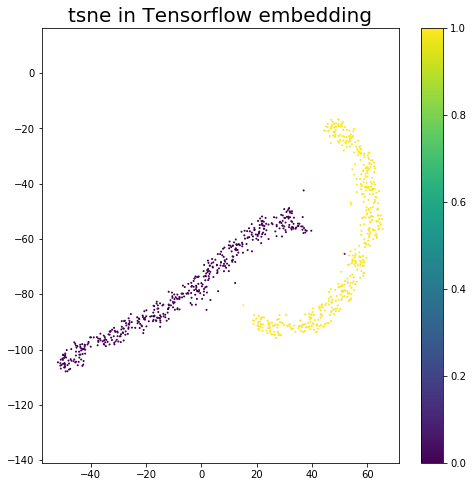

In [23]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train[:len(z)],
    s=1,
    alpha=1,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("tsne in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save output

In [24]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [27]:
output_dir = MODEL_DIR/'projections'/ dataset / 'parametric-tsne'
ensure_dir(output_dir)
output_dir

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/models/projections/moons/parametric-tsne')

In [28]:
np.save(output_dir / 'z.npy', z)